In [2]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

ERROR: Error in library(tidyverse): there is no package called 'tidyverse'


In [1]:
library(s20x)
library(statmod)
library(VGAM)
chd.df = read.csv("/kaggle/input/coronary-heart-disease-data/chd-grouped.csv")
chickens.df = read.csv("/kaggle/input/macrorhabdus-ornithogaster-chicken-data/chickens.csv")

ERROR: Error in library(s20x): there is no package called 's20x'


Warning message in arrows(x, mu.true, x, y, length = 0.1, lwd = 1.6):
“zero-length arrow is of indeterminate angle and so skipped”


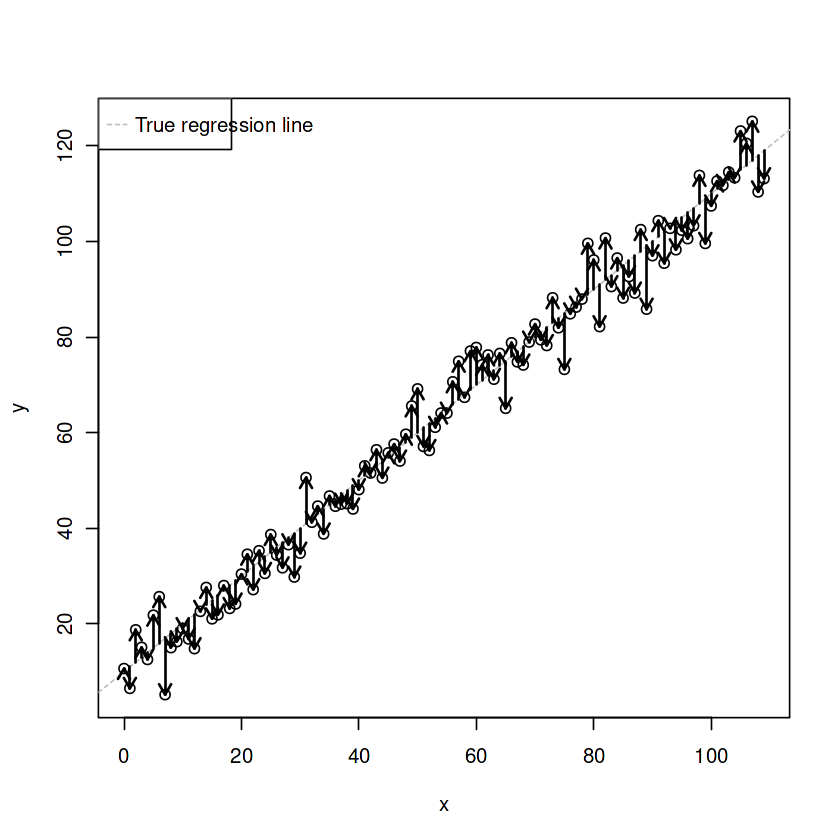

In [3]:
set.seed(1010)

sigma = 5
sample.size = 110
error = rnorm(n = sample.size, mean = 0, sd = sigma)
x = seq(0, length.out = sample.size)

beta0.true = 10
beta1.true = 1
mu.true = beta0.true + beta1.true * x

y = mu.true + error 

plot(x, y, xlab = "x", ylab = "y")
abline(beta0.true, beta1.true, col = "gray", lty = 2)
legend("topleft", legend="True regression line", col = "gray", lty = 2)
arrows(x, mu.true, x, y, length=0.1, lwd = 1.6)



Warning message in arrows(x, yhat, x, y, length = 0.1, col = "red"):
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(x, yhat, x, y, length = 0.1, col = "red"):
“zero-length arrow is of indeterminate angle and so skipped”


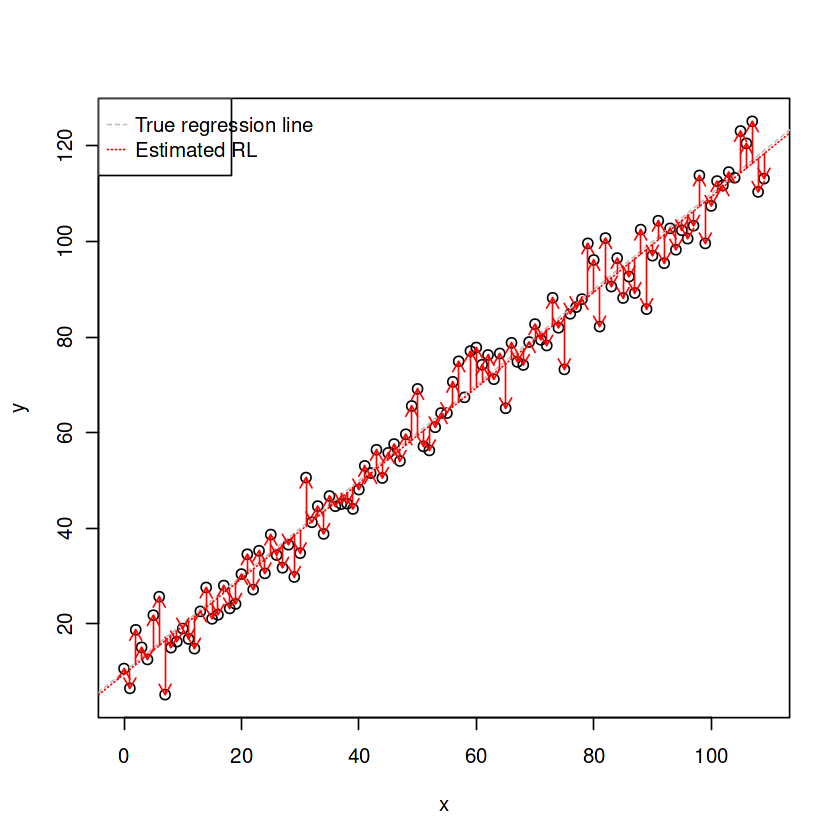

In [4]:
sim.df = data.frame(y=y,x=x)
simple.fit = lm(y~x, data = sim.df)

yhat = simple.fit$coefficients[1] + simple.fit$coefficients[2] * x

res = y - yhat 


plot(x, y, xlab = "x", ylab = "y")
abline(beta0.true, beta1.true, col = "gray", lty = 2)
abline(simple.fit, col = "red", lty = 3)
legend("topleft", legend=c("True regression line", "Estimated RL"), col = c("gray","red"), lty = c(2,3))
arrows(x, yhat, x, y, length=0.1, col = "red")

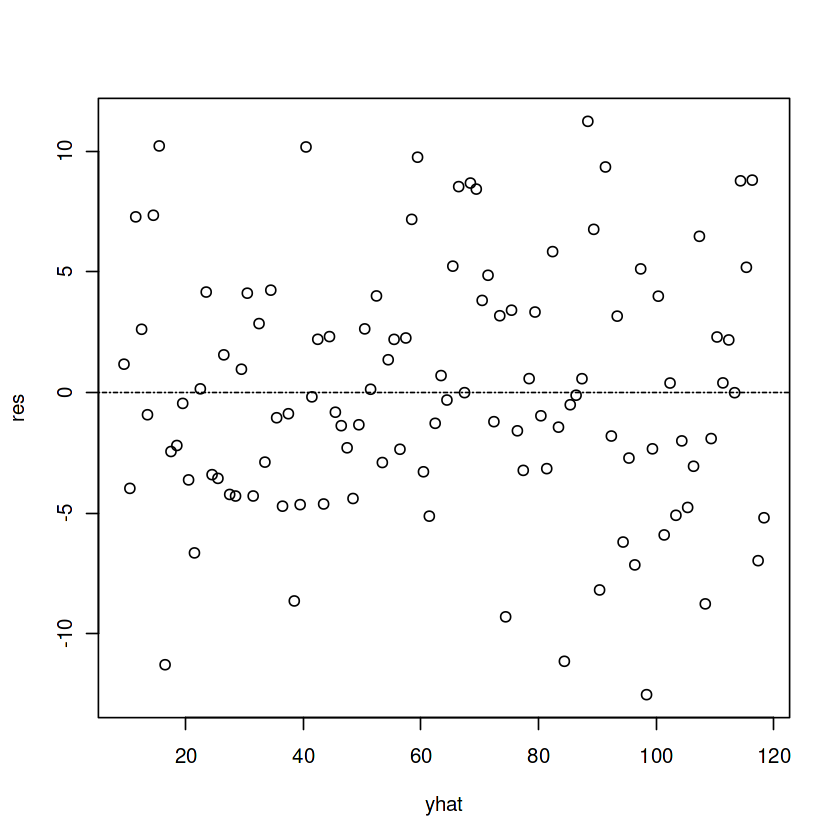

In [5]:
plot(yhat, res)
abline(h = 0, lty = 4)

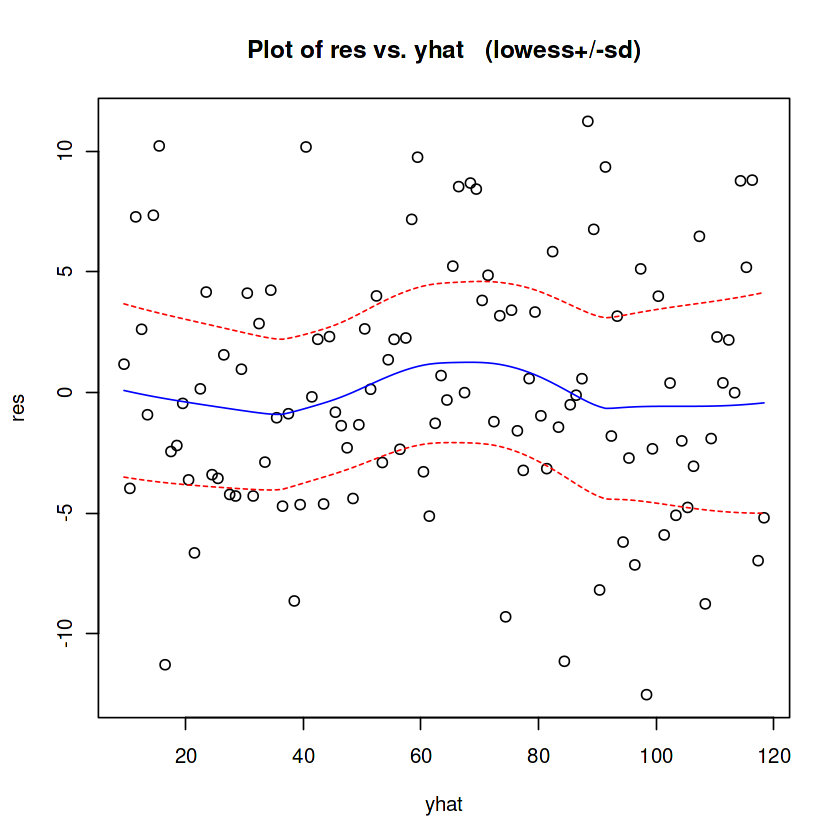

In [6]:
trendscatter(res~yhat)

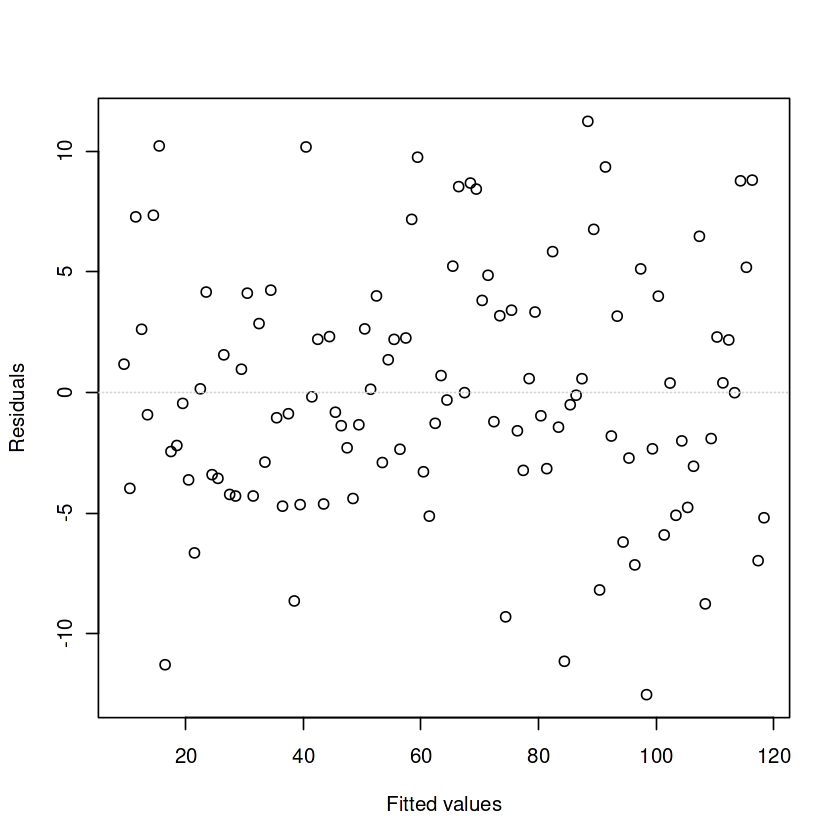

In [7]:
eovcheck(simple.fit)

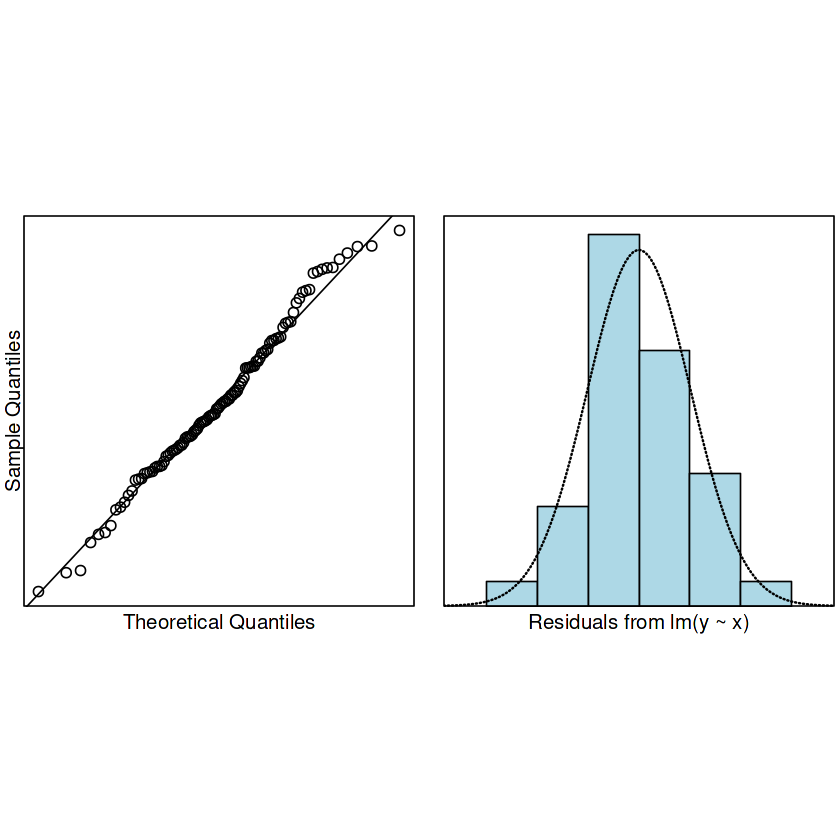

In [8]:
normcheck(simple.fit)

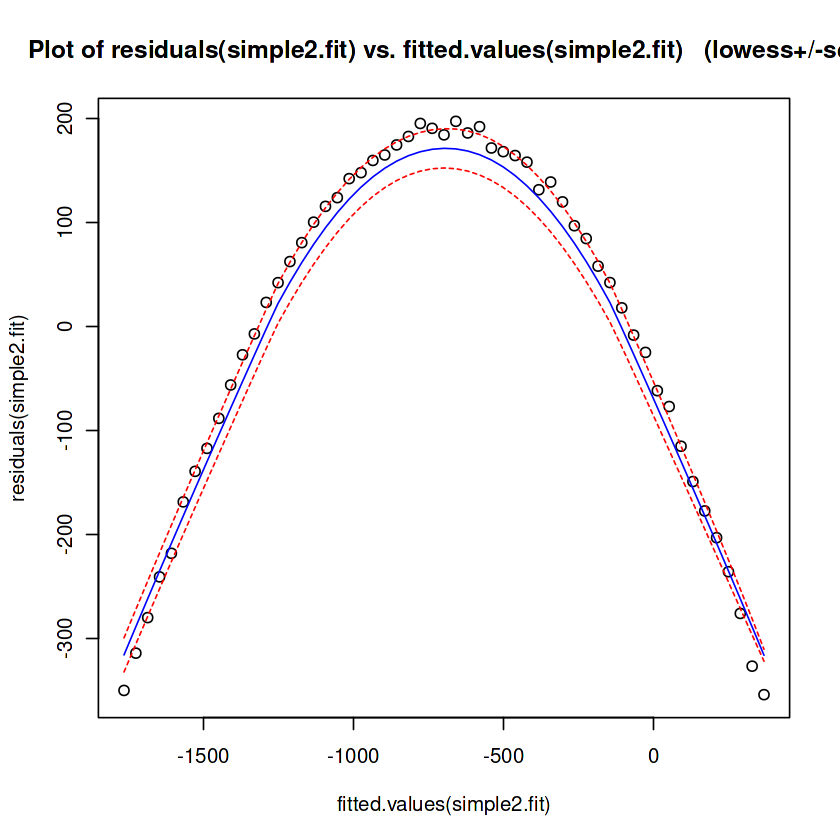

In [9]:
sigma = 5
sample.size = 55
x = seq(0, length.out = sample.size)
beta2.true = -0.75 # the 2nd degree coefficient

error = rnorm(n = sample.size, mean = 0, sd = sigma)
mu.true = beta0.true + beta1.true * x + beta2.true * x^2
y = mu.true + error 

y = rnorm(n = sample.size, mean = mu.true, sd = sigma)


sim2.df = data.frame(y=y, x=x)
simple2.fit =  lm(y~x, data = sim2.df)
trendscatter(residuals(simple2.fit)~fitted.values(simple2.fit))
# Why it is important to detect beta2 being none zero even when it is very small

In [10]:
# There is a pattern in the variance of our residuals
# 1. transform y log-linear log-log
# 2. Change the model, ie. GLM

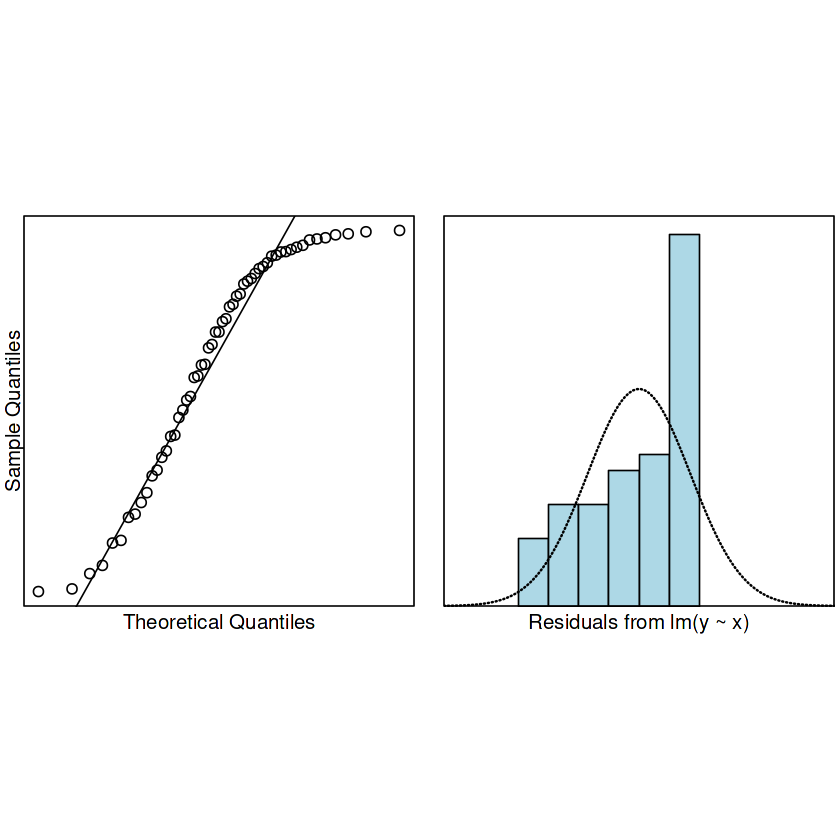

In [11]:
normcheck(simple2.fit)

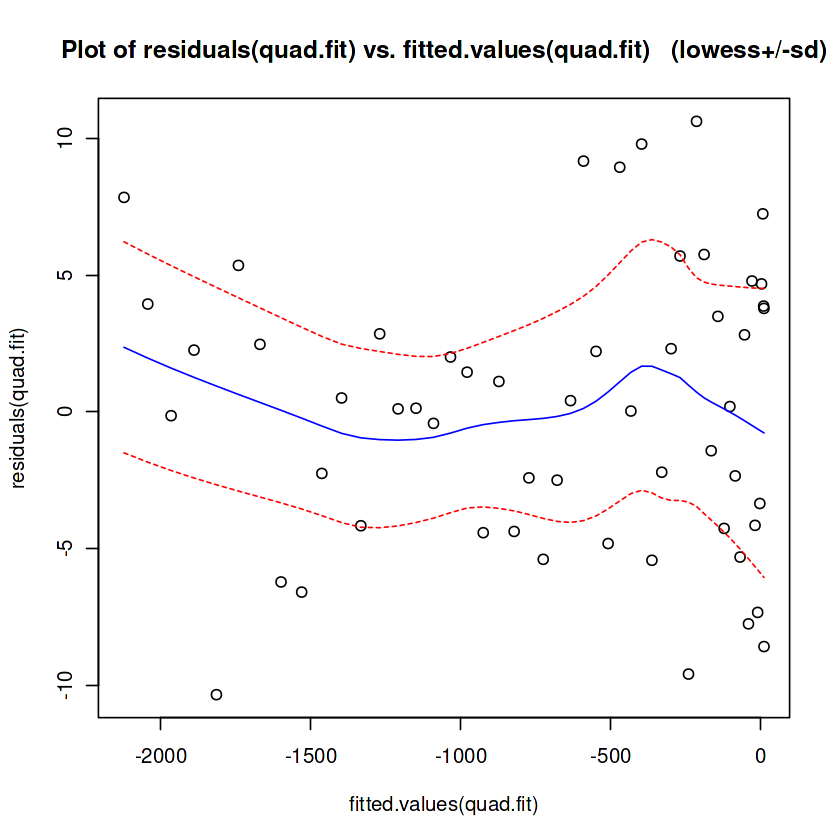

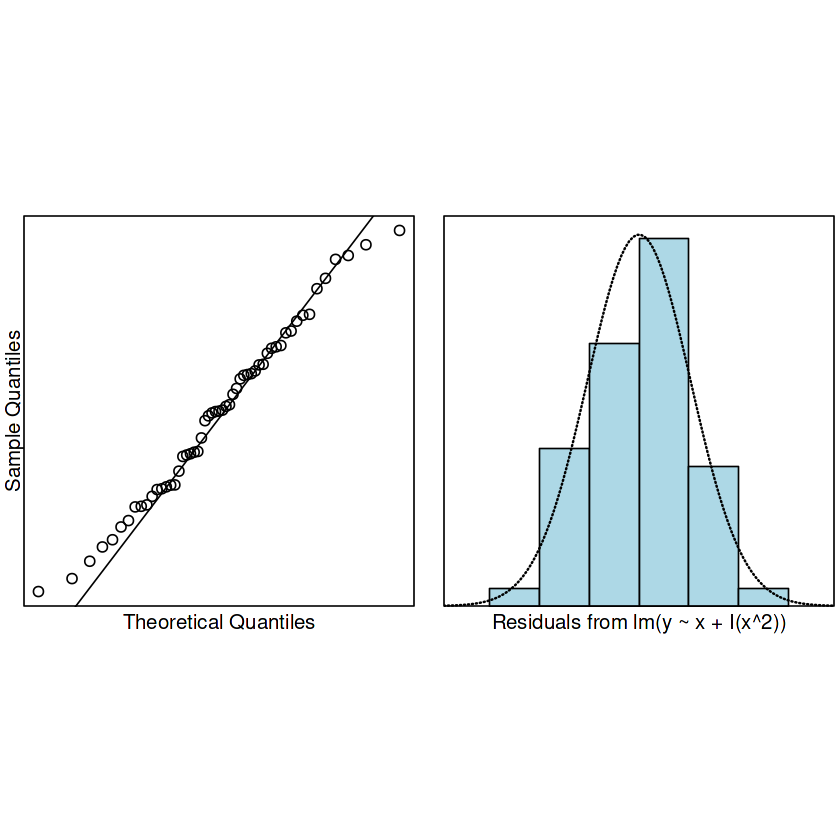

In [12]:
quad.fit = lm(y~x+I(x^2), data = sim2.df)
trendscatter(residuals(quad.fit)~fitted.values(quad.fit))
normcheck(quad.fit)

In [13]:
# How to simulate GLM (Poisson regression model) lambda = mu
set.seed(4444)
x = seq(0,10, length.out = 50)
n = length(x)

beta0.true = 1.2
beta1.true = 0.45
mu.true = exp(beta0.true + beta1.true*x)
y = rpois(n = n ,lambda = mu.true)


sim.pois.df = data.frame(y=y,x=x)
sim.pois.fit = glm(y~x, family = "poisson", data = sim.pois.df)
summary(sim.pois.fit)


Call:
glm(formula = y ~ x, family = "poisson", data = sim.pois.df)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) 1.256899   0.071529   17.57   <2e-16 ***
x           0.440619   0.008732   50.46   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 3787.212  on 49  degrees of freedom
Residual deviance:   45.989  on 48  degrees of freedom
AIC: 312.81

Number of Fisher Scoring iterations: 4


1          2          3          4          5          6          7 
  3.514507   3.845184   4.206975   4.602805   5.035880   5.509701   6.028105 
         8          9         10         11         12         13         14 
  6.595284   7.215829   7.894760   8.637572   9.450274  10.339442  11.312272 
        15         16         17         18         19         20         21 
 12.376634  13.541142  14.815217  16.209168  17.734276  19.402879  21.228480 
        22         23         24         25         26         27         28 
 23.225851  25.411152  27.802066  30.417940  33.279939  36.411221  39.837123 
        29         30         31         32         33         34         35 
 43.585365  47.686276  52.173039  57.081958  62.452752  68.328880  74.757889 
        36         37         38         39         40         41         42 
 81.791797  89.487520  97.907328 107.119348 117.198119 128.225194 140.289798 
        43         44         45         46         47         48         49 
153.489550 167.931256 183.731770 201.018942 219.932649 240.625931 263.266228 
        50 
288.036732

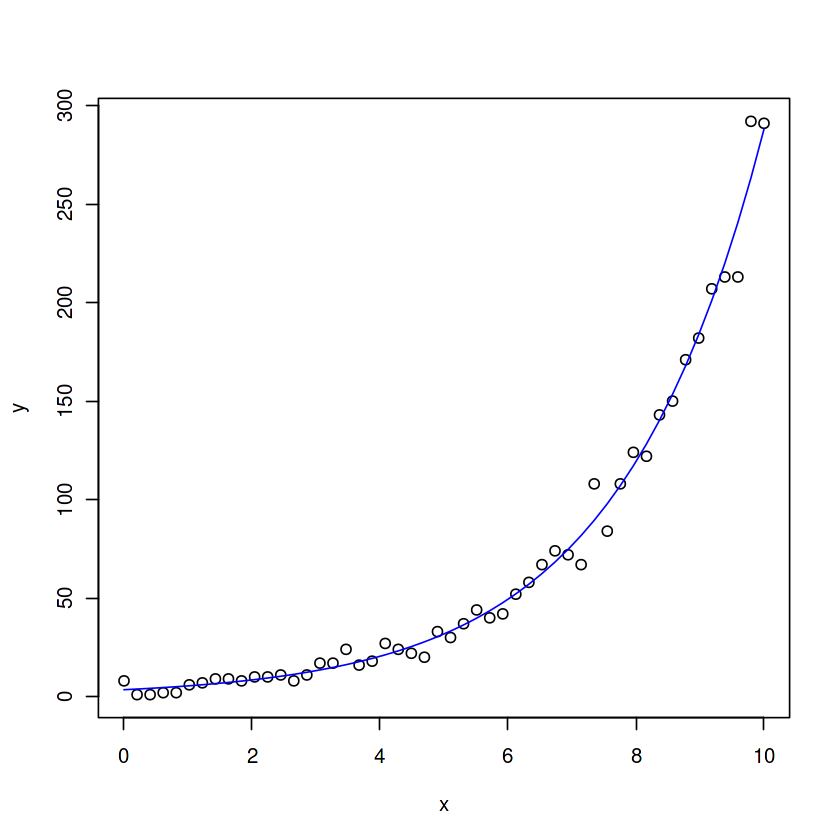

In [14]:
yhat = predict(sim.pois.fit, type = "response") # exp(sim.pois.fit$coefficients[1]+sim.pois.fit$coefficients[2]*x)
yhat
plot(x,y)

lines(x, y=yhat, col = "blue")

In [15]:
yhat.link = predict(sim.pois.fit) # fitted values on link scale 
sim.pois.fit$coefficients[1]+sim.pois.fit$coefficients[2]*x

[1] 1.256899 1.346822 1.436744 1.526666 1.616588 1.706510 1.796433 1.886355
 [9] 1.976277 2.066199 2.156122 2.246044 2.335966 2.425888 2.515810 2.605733
[17] 2.695655 2.785577 2.875499 2.965421 3.055344 3.145266 3.235188 3.325110
[25] 3.415033 3.504955 3.594877 3.684799 3.774721 3.864644 3.954566 4.044488
[33] 4.134410 4.224333 4.314255 4.404177 4.494099 4.584021 4.673944 4.763866
[41] 4.853788 4.943710 5.033632 5.123555 5.213477 5.303399 5.393321 5.483244
[49] 5.573166 5.663088

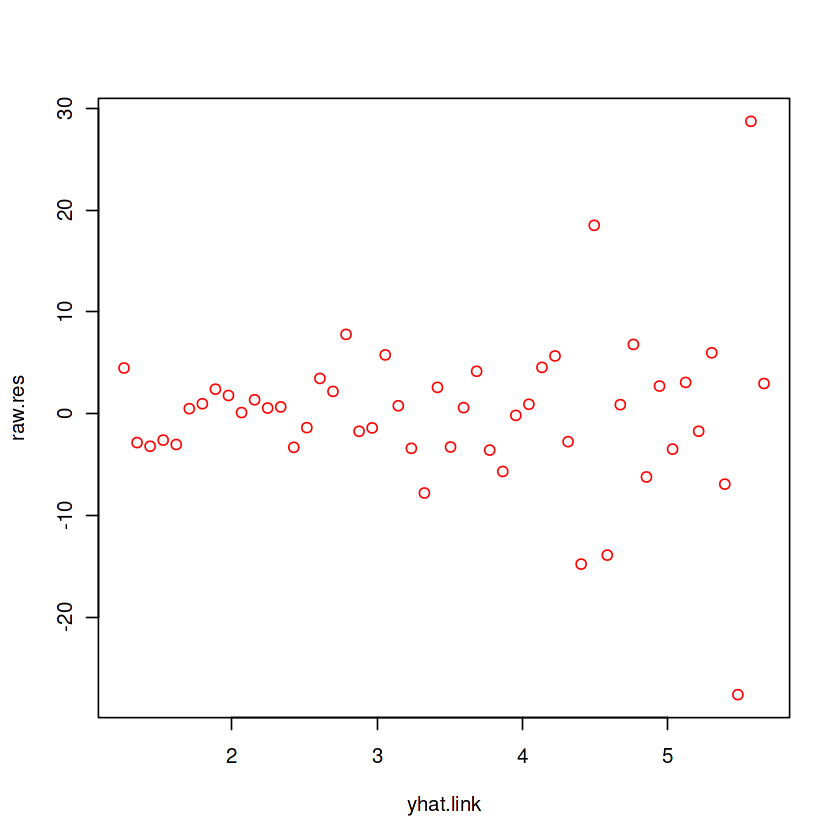

In [16]:
raw.res = y - yhat
plot(yhat.link, raw.res, col = "red")
# Any comment?
# it is zero centred, but he scatter is not constant. Does it make sense? 

In [17]:
# What kind of properties do we want the residuals to have? 
# 1. Points near the regression line have a residual value close to zero 
# 2. Points far above the line have large positive values 
# 3. Points far below the line have large negative values 
# 4. Constant scatter if the model is correct


# We cannot distinguish the non-constant scatter in the raw residuals plot is due to the GLM itself or having the wrong model
# In order to use it as diagnostic tool, we have to remove the 1st possibility 

